In [0]:
import os
import cv2
import tarfile
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Tarfile 

In [0]:
tar = tarfile.open("trainingSet.tar.gz")
tar.extractall()
tar.close()

In [4]:
os.listdir("trainingSet/")

['3', '4', '9', '0', '5', '1', '7', '8', '6', '2']

(28, 28)


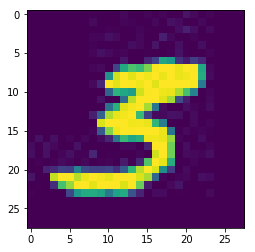

In [5]:
x = cv2.imread("trainingSet/3/img_10149.jpg")
x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
print(x.shape)
plt.imshow(x)

(28, 28, 3)


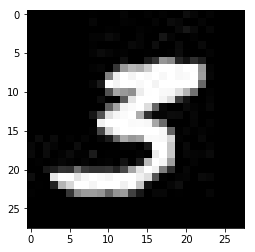

In [6]:
x = cv2.imread("trainingSet/3/img_10149.jpg")
print(x.shape)
plt.imshow(x)

In [7]:
data=[]
for target_dirs in os.listdir("trainingSet/"):
  for img_file in os.listdir("trainingSet/"+target_dirs)[:200]:
    img = cv2.imread("trainingSet/"+target_dirs+"/"+img_file,cv2.COLOR_BGR2GRAY)
    img = img.reshape(-1)
    row = (img, int(target_dirs))
    data.append(row)
  
data = np.array(data)
data.shape

(2000, 2)

In [8]:
df = pd.DataFrame(data, columns=["image","target"])
df.head()

,image,target
0,"[0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 9, 0, 0, 0, 4, ...",3
1,"[0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 20, 0, 6, 4,...",3
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 0, 0, 0, 1, ...",3
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 6,...",3
4,"[0, 0, 4, 6, 0, 5, 0, 1, 0, 7, 0, 0, 5, 0, 0, ...",3


Target  1


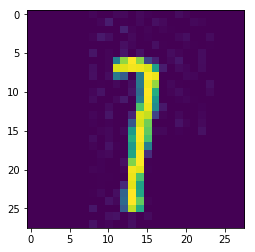

In [9]:
idx = 1002
img = df.iloc[idx, 0].reshape(28,28)
target = df.iloc[idx, 1]
print("Target ", target)
plt.imshow(img)
plt.show()

In [10]:
df.target.value_counts()

9    200
8    200
7    200
6    200
5    200
4    200
3    200
2    200
1    200
0    200
Name: target, dtype: int64

In [0]:
X = list(df.image.values)
X = np.array(X)
Y = df.target.values
Y = np.array(Y, dtype=np.int)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1600, 784)
(1600,)
(400, 784)
(400,)


In [13]:
clf = LogisticRegression()
clf.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_train_pred = clf.predict(x_train)
print("Train Accuracy =", accuracy_score(y_train,y_train_pred))
y_test_pred = clf.predict(x_test)
print("Test Accuracy = ", accuracy_score(y_test,y_test_pred))

Train Accuracy = 1.0
Test Accuracy =  0.825


In [15]:
clf = SVC()
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
y_train_pred = clf.predict(x_train)
print("Train Accuracy =", accuracy_score(y_train,y_train_pred))
y_test_pred = clf.predict(x_test)
print("Test Accuracy = ", accuracy_score(y_test,y_test_pred))

Train Accuracy = 1.0
Test Accuracy =  0.0775
